In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

## Importing the data

In [2]:
data = pd.read_csv("neonatal_basic_data.csv")
training_set = data[data['death']!=0]
training_labels = training_set['death']
training_data = training_set[['ga', 'bw']]
test_set = data[data['death']==0]
#test_labels = test_set['death']
test_data = test_set[['ga', 'bw']]

scale the data

In [3]:
scaler = StandardScaler()
training_data_stand = scaler.fit_transform(training_data)
test_data_stand = scaler.fit_transform(test_data)

minmaxscaler = MinMaxScaler()
training_data_minmax = minmaxscaler.fit_transform(training_data)
test_data_minmax = minmaxscaler.fit_transform(test_data)

## Visualization of the class distribution

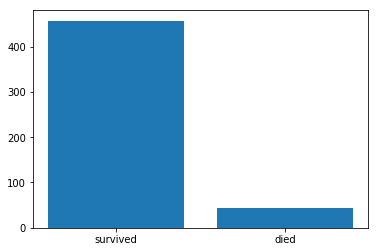

In [4]:
labels = training_labels.as_matrix()
classes, distribution = np.unique(labels, return_counts=True)
plt.bar(classes, distribution)
plt.xticks(classes, ["survived", "died"])
plt.show()

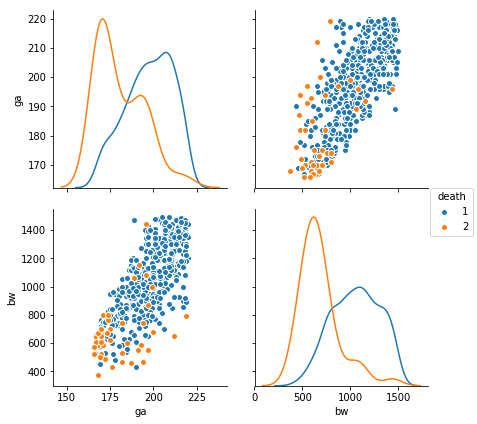

In [5]:
sns.pairplot(training_set[['ga', 'bw', 'death']]
             , hue="death"
             , vars=['ga', 'bw']
             , diag_kind="kde"
             #, kind="reg"
             , size=3
            )
plt.show()

### Decision Trees

In [6]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(training_data_stand, training_labels)
print('score for decision trees: ', classifier.score(training_data_stand, training_labels))
print('f1 measure for decision trees: ', f1_score(training_labels, classifier.predict(training_data_stand),
                                                  average='weighted'))
p = classifier.predict(test_data_stand)

('score for decision trees: ', 0.998)
('f1 measure for decision trees: ', 0.99798932819029251)


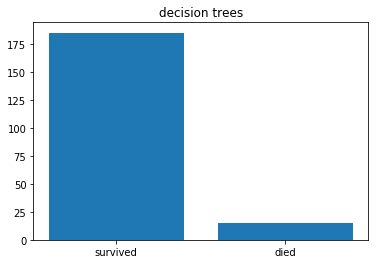

In [7]:
classes, distribution = np.unique(p, return_counts=True)
plt.bar(classes, distribution)
plt.title('decision trees')
plt.xticks(classes, ["survived", "died"])
plt.show()

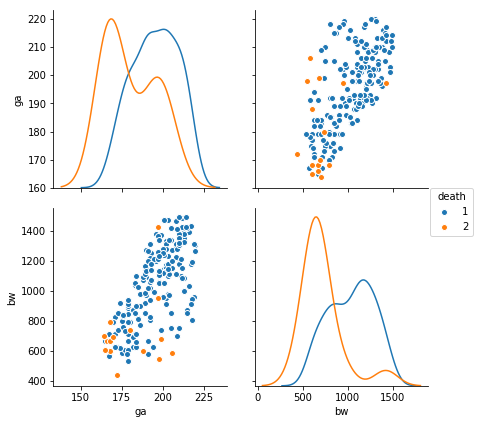

In [8]:
dt_pred = pd.DataFrame(data={#'patientid':test_set['patientid'].as_matrix(), 
                             'ga':test_set['ga'].as_matrix(), 'bw':test_set['bw'].as_matrix(), 'death':p})
sns.pairplot(dt_pred[['ga', 'bw', 'death']]
             , hue="death"
             , vars=['ga', 'bw']
             , diag_kind="kde"
             #, kind="reg"
             , size=3
            )
plt.show()

### SVM

In [9]:
SVM = svm.SVC(class_weight='balanced', kernel='rbf')
SVM.fit(training_data_stand, training_labels)
print('score for SVM: ', SVM.score(training_data_stand, training_labels))
print('f1 measure for SVM: ', f1_score(training_labels, SVM.predict(training_data_stand),
                                                  average='weighted'))
p = SVM.predict(test_data_stand)

('score for SVM: ', 0.85599999999999998)
('f1 measure for SVM: ', 0.87969506549788246)


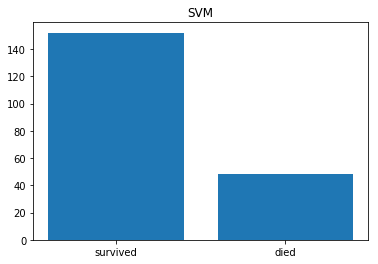

In [10]:
classes, distribution = np.unique(p, return_counts=True)
plt.bar(classes, distribution)
plt.title('SVM')
plt.xticks(classes, ["survived", "died"])
plt.show()

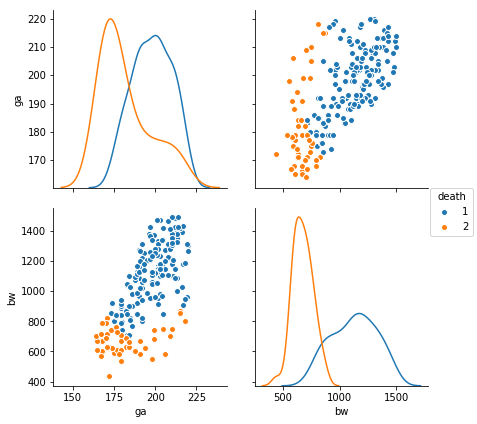

In [11]:
svm_pred = pd.DataFrame(data={#'patientid':test_set['patientid'].as_matrix(), 
                             'ga':test_set['ga'].as_matrix(), 'bw':test_set['bw'].as_matrix(), 'death':p})
sns.pairplot(svm_pred[['ga', 'bw', 'death']]
             , hue="death"
             , vars=['ga', 'bw']
             , diag_kind="kde"
             #, kind="reg"
             , size=3
            )
plt.show()

### Logistic Regression

In [12]:
LogReg = LogisticRegression()
LogReg.fit(training_data_stand, training_labels)
print('score for logistic regression: ', LogReg.score(training_data_stand, training_labels))
print('f1 measure for logistic regression: ', f1_score(training_labels, LogReg.predict(training_data_stand),
                                                  average='weighted'))
p = LogReg.predict(test_data_stand)

('score for logistic regression: ', 0.92000000000000004)
('f1 measure for logistic regression: ', 0.89764936183540833)


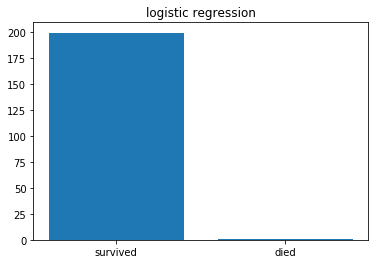

In [13]:
classes, distribution = np.unique(p, return_counts=True)
plt.bar(classes, distribution)
plt.title('logistic regression')
plt.xticks(classes, ["survived", "died"])
plt.show()

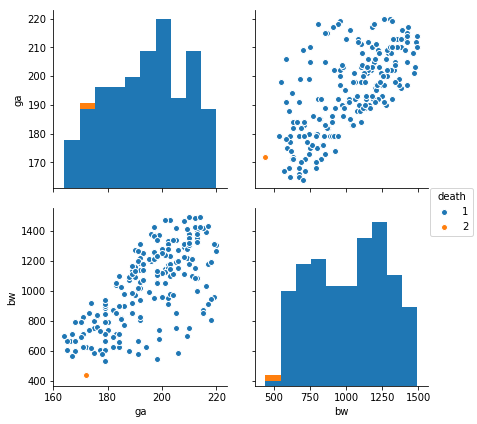

In [14]:
lg_pred = pd.DataFrame(data={#'patientid':test_set['patientid'].as_matrix(), 
                             'ga':test_set['ga'].as_matrix(), 'bw':test_set['bw'].as_matrix(), 'death':p})
sns.pairplot(lg_pred[['ga', 'bw', 'death']]
             , hue="death"
             , vars=['ga', 'bw']
             #, diag_kind="kde"
             #, kind="reg"
             , size=3
            )
plt.show()

### Naive Bayes

In [15]:
MNB = MultinomialNB()
MNB.fit(training_data_minmax, training_labels)
print('score for Multinomial Naive Bayes: ', MNB.score(training_data_minmax, training_labels))
print('f1 measure for Multinomial Naive Bayes: ', f1_score(training_labels, MNB.predict(training_data_minmax),
                                                  average='weighted'))
p = MNB.predict(test_data_minmax)

('score for Multinomial Naive Bayes: ', 0.91400000000000003)
('f1 measure for Multinomial Naive Bayes: ', 0.87293207941483797)


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


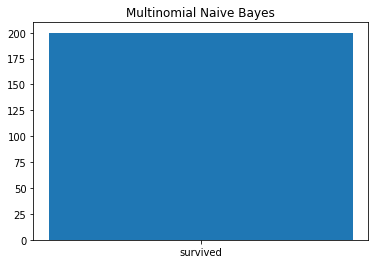

In [16]:
classes, distribution = np.unique(p, return_counts=True)
plt.bar(classes, distribution)
plt.title('Multinomial Naive Bayes')
plt.xticks(classes, ["survived", "died"])
plt.show()

In [17]:
GNB = GaussianNB()
GNB.fit(training_data_minmax, training_labels)
print('score for logistic regression: ', GNB.score(training_data_minmax, training_labels))
print('f1 measure for logistic regression: ', f1_score(training_labels, GNB.predict(training_data_minmax),
                                                  average='weighted'))
p = GNB.predict(test_data_minmax)

('score for logistic regression: ', 0.89200000000000002)
('f1 measure for logistic regression: ', 0.89950845015066172)


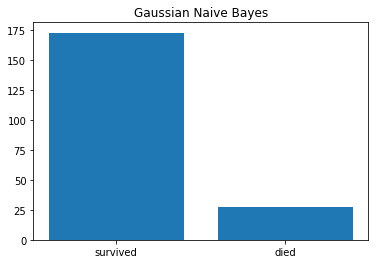

In [18]:
classes, distribution = np.unique(p, return_counts=True)
plt.bar(classes, distribution)
plt.title('Gaussian Naive Bayes')
plt.xticks(classes, ["survived", "died"])
plt.show()

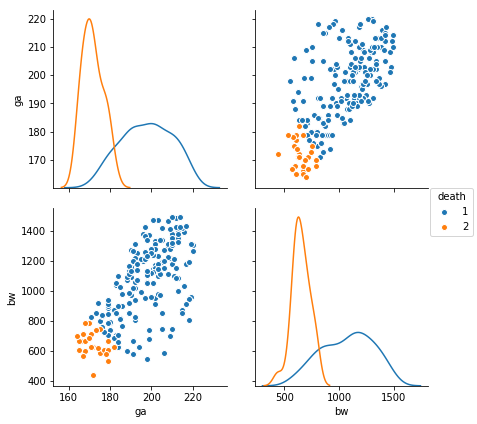

In [19]:
gnb_pred = pd.DataFrame(data={#'patientid':test_set['patientid'].as_matrix(), 
                             'ga':test_set['ga'].as_matrix(), 'bw':test_set['bw'].as_matrix(), 'death':p})
sns.pairplot(gnb_pred[['ga', 'bw', 'death']]
             , hue="death"
             , vars=['ga', 'bw']
             , diag_kind="kde"
             #, kind="reg"
             , size=3
            )
plt.show()

### Gaussian Processes

In [20]:
kernel = 1.0 * RBF(length_scale=1.0)
gp = GaussianProcessClassifier(kernel=kernel, optimizer=None)
gp.fit(training_data, training_labels)
p = gp.predict(test_data)

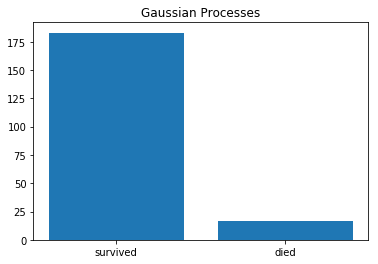

In [21]:
classes, distribution = np.unique(p, return_counts=True)
plt.bar(classes, distribution)
plt.title('Gaussian Processes')
plt.xticks(classes, ["survived", "died"])
plt.show()

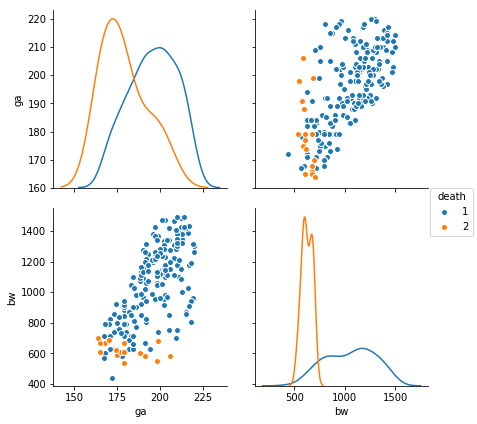

In [22]:
gp_pred = pd.DataFrame(data={#'patientid':test_set['patientid'].as_matrix(), 
                             'ga':test_set['ga'].as_matrix(), 'bw':test_set['bw'].as_matrix(), 'death':p})
sns.pairplot(gp_pred[['ga', 'bw', 'death']]
             , hue="death"
             , vars=['ga', 'bw']
             , diag_kind="kde"
             #, kind="reg"
             , size=3
            )
plt.show()

## Mixing prediction
Final prediction are:
    - Survived: if all the models agree that the patient survived
    - Died: if at least one of the model classify the patient as died

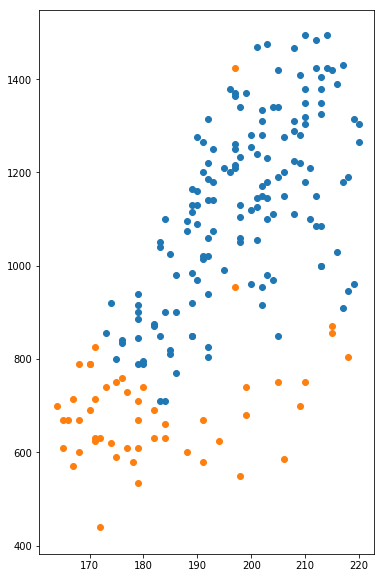

In [44]:
pred = pd.DataFrame(data={'patientid':test_set['patientid'].as_matrix(), 
                             'ga':test_set['ga'].as_matrix(), 'bw':test_set['bw'].as_matrix()
    , 'death_dt':dt_pred['death'], 'death_svm':svm_pred['death']
    , 'death_gnb':gnb_pred['death'], 'death_gp':gp_pred['death']})

died = pred.loc[(pred['death_dt'] == 2) | (pred['death_svm']==2) | (pred['death_gp'] == 2) | (pred['death_gnb']==2)]
survived = pred.loc[(pred['death_dt'] == 1) & (pred['death_svm']==1) & (pred['death_gp'] == 1) & (pred['death_gnb'] == 1)]
plt.figure(figsize=(6,10))
plt.scatter(survived['ga'], survived['bw'])
plt.scatter(died['ga'], died['bw'])
plt.show()

## Integration with time-series data

In [55]:
ts = pd.read_csv("timeseries.csv", names=['ID1','mean ABP_S','var ABP_S','slope ABP_S','intercept ABP_S','mean ABP_M','var ABP_M','slope ABP_M','intercept ABP_M','mean ABP_D','var ABP_D','slope ABP_D','intercept ABP_D','mean HR_ECG','var HR_ECG','slope HR_ECG','intercept HR_ECG','mean SpO2','var SpO2','slope SpO2','intercept SpO2'])
training_data = ts[ts['ID1'].isin(data[data['death']!=0]['patientid'])]
training_data.drop(['ID1'], axis=1)
test_data = ts[ts['ID1'].isin(data[data['death']==0]['patientid'])]
test_data.drop(['ID1'], axis=1)

,mean ABP_S,var ABP_S,slope ABP_S,intercept ABP_S,mean ABP_M,var ABP_M,slope ABP_M,intercept ABP_M,mean ABP_D,var ABP_D,slope ABP_D,intercept ABP_D,mean HR_ECG,var HR_ECG,slope HR_ECG,intercept HR_ECG,mean SpO2,var SpO2,slope SpO2,intercept SpO2
500,501.0,0.0,0.005635,43.526017,273.0,20171.666667,0.005253,35.310055,35.097222,63.411844,0.004939,27.707737,29.111111,63.774691,0.001842,156.236541,23.666667,17.259259,-0.00312,98.415016
501,502.0,0.0,0.005635,43.526017,731.0,167087.666667,0.005253,35.310055,42.063077,64.976021,0.004939,27.707737,31.080000,41.070523,0.001842,156.236541,22.409231,22.115607,-0.00312,98.415016
502,503.0,0.0,0.005635,43.526017,727.0,168981.000000,0.005253,35.310055,48.689076,18.372234,0.004939,27.707737,42.447412,24.123695,0.001842,156.236541,36.692437,6.434817,-0.00312,98.415016
503,504.0,0.0,0.005635,43.526017,732.0,166616.000000,0.005253,35.310055,44.915328,24.836626,0.004939,27.707737,39.303650,28.628965,0.001842,156.236541,33.697810,17.010871,-0.00312,98.415016
504,505.0,0.0,0.005635,43.526017,731.0,167087.666667,0.005253,35.310055,47.118871,273.014102,0.004939,27.707737,35.639466,179.156365,0.001842,156.236541,27.141159,326.739361,-0.00312,98.415016
505,506.0,0.0,0.005635,43.526017,734.0,165674.666667,0.005253,35.310055,42.327460,80.693064,0.004939,27.707737,35.499266,55.213289,0.001842,156.236541,29.208517,29.533613,-0.00312,98.415016
506,507.0,0.0,0.005635,43.526017,732.0,166616.000000,0.005253,35.310055,55.540890,34.222503,0.004939,27.707737,45.582496,22.768302,0.001842,156.236541,37.410330,17.980840,-0.00312,98.415016
507,508.0,0.0,0.005635,43.526017,746.0,160082.666667,0.005253,35.310055,44.297583,12.127456,0.004939,27.707737,36.773414,17.126906,0.001842,156.236541,30.231118,9.425437,-0.00312,98.415016
508,509.0,0.0,0.005635,43.526017,730.0,167560.000000,0.005253,35.310055,45.821101,13.917536,0.004939,27.707737,40.686544,27.215201,0.001842,156.236541,35.165138,13.449794,-0.00312,98.415016
509,510.0,0.0,0.005635,43.526017,738.0,163800.000000,0.005253,35.310055,38.709677,21.545513,0.004939,27.707737,32.388633,14.425001,0.001842,156.236541,27.145929,9.835847,-0.00312,98.415016


In [56]:
scaler = StandardScaler()
training_data_stand = scaler.fit_transform(training_data)
test_data_stand = scaler.fit_transform(test_data)